In [4]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [5]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

In [6]:
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,FCF,PricePerShare,ROE,QMonth,Prediction
1985-03,-1.232322,-1.079314,-0.669004,-1.336060,13.035309
1985-06,-1.232322,-1.084088,-0.669004,-0.439081,13.160484
1985-09,-1.232322,-1.081432,-0.669004,0.457899,16.657703
1985-12,-1.232322,-1.007231,-0.669004,1.354878,16.345213
1986-03,-1.232322,-1.013861,-0.669004,-1.336060,15.921562
1986-06,-1.232322,-1.022850,-0.669004,-0.439081,14.741072
1986-09,-1.232322,-1.047896,-0.669004,0.457899,13.267827
1986-12,-1.232322,-1.079154,-0.669004,1.354878,16.734827
1987-03,-1.232322,-1.005595,-0.669004,-1.336060,18.234604
1987-06,-1.232322,-0.973774,-0.669004,-0.439081,17.033018


In [4]:
X_scaled = np.array(data.drop(['Prediction'], axis=1))
y_scaled = np.array(data['Prediction'])

In [5]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [6]:
svr = GridSearchCV(SVR(),
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]})

In [8]:
svr = GridSearchCV(SVR(),
                   param_grid={"kernel": ['linear', 'poly', 'rbf'],
                               "degree": [1, 2, 3, 4, 5, 6],
                               "C": [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30],
                               "gamma": [0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.009, 0.01, 0.02, 0.1, 0.2, 0.3, 0.4]})

In [70]:
# Create and train the Support Vector Machine (Regressor) 
#svr = svr = SVR(kernel='rbf', C=14.0, gamma=0.03, epsilon=0.4)
#svr = SVR(kernel='rbf', C=200, gamma=0.98, epsilon=0.05)
svr.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30],
                         'epsilon': [0.0001, 0.0003, 0.0005, 0.0008, 0.01, 0.1,
                                     0.2, 0.3, 0.4],
                         'gamma': [0.001, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4],
                         'kernel': ['rbf']})

In [7]:
HOLDOUT = 10
params = dict()
for i in range(HOLDOUT):
    # Split the data into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=i)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    # Train model
    svr.fit(X_train, y_train)
    # Get best params
    param = str(svr.best_params_)
    if param in list(params.keys()):
        params[param]['count'] += 1
        params[param]['train_score'].append(svr.score(X_train, y_train))
        params[param]['test_score'].append(svr.score(X_test, y_test))
        params[param]['random_seeds'].append(i)
    else:
        params[param] = {'count':1, 'train_score':[svr.score(X_train, y_train)], 'test_score':[svr.score(X_test, y_test)], 'random_seeds':[i]}
for key in (params.keys()):
    print('Params={}\nCount:{}\nTrain_Score:{}\nTest_Score:{}\nRandom_Seeds:{}\n\n'.format(key,params[key]['count'], np.mean(params[key]['train_score']), np.mean(params[key]['test_score']), str(params[key]['random_seeds'])))

Params={'C': 3, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear'}
Count:1
Train_Score:0.8894624656311313
Test_Score:0.8996640106732436
Random_Seeds:[0]


Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear'}
Count:3
Train_Score:0.8883378784653256
Test_Score:0.8883697293864011
Random_Seeds:[1, 4, 7]


Params={'C': 7, 'epsilon': 0.0003, 'gamma': 9e-05, 'kernel': 'linear'}
Count:1
Train_Score:0.8848740101863202
Test_Score:0.9055514094641373
Random_Seeds:[2]


Params={'C': 1, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear'}
Count:3
Train_Score:0.8922313399839754
Test_Score:0.868932745329968
Random_Seeds:[3, 5, 6]


Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear'}
Count:1
Train_Score:0.9221900602742115
Test_Score:0.6363810256152936
Random_Seeds:[8]


Params={'C': 5, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear'}
Count:1
Train_Score:0.9037131789519381
Test_Score:0.8188801482491164
Random_Seeds:[9]




In [9]:
#Results log
#Params={'C': 7, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 5, 8, 9]} #PricePerShare
Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [1, 4, 7]} #P/S, P/B
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=Params['rs'][randint(0,len(Params['rs'])-1)])
y_train = y_train.ravel()
y_test = y_test.ravel()
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
svr.fit(X_train, y_train)

SVR(C=1, epsilon=0.01, gamma=9e-05, kernel='linear')

In [10]:
[svr.score(X_train, y_train)]

[0.8785184488702573]

In [11]:
svr.score(X_test, y_test)

0.9168958513862779

In [12]:
mean_squared_error(y_test, svr.predict(X_test), squared=False)

12.758580305128524

In [149]:
#abs_sc_predict.inverse_transform(svr.predict(X_pred_scaled).reshape(1,-1))
sc_predict.inverse_transform(svr.predict(X_scaled[-1:, :]))

array([71.34155587])

In [166]:
#abs_sc_predict.inverse_transform(y_scaled[-1:, :])
sc_predict.inverse_transform(y_scaled[-1:, :])

array([[115.6105423]])

In [246]:
X_pred_scaled[:,-1]

array([1.53023942, 1.68216111, 1.68716952, 1.69217793])

In [247]:
X_scaled[:,-1]

array([-1.65677714, -1.65176873, -1.64676032, -1.64175192, -1.48983023,
       -1.48482182, -1.47981341, -1.474805  , -1.32288331, -1.31787491,
       -1.3128665 , -1.30785809, -1.1559364 , -1.15092799, -1.14591959,
       -1.14091118, -0.98898949, -0.98398108, -0.97897267, -0.97396427,
       -0.82204258, -0.81703417, -0.81202576, -0.80701735, -0.65509566,
       -0.65008726, -0.64507885, -0.64007044, -0.48814875, -0.48314034,
       -0.47813193, -0.47312353, -0.32120184, -0.31619343, -0.31118502,
       -0.30617661, -0.15425492, -0.14924652, -0.14423811, -0.1392297 ,
        0.01269199,  0.0177004 ,  0.0227088 ,  0.02771721,  0.1796389 ,
        0.18464731,  0.18965572,  0.19466412,  0.34658581,  0.35159422,
        0.35660263,  0.36161104,  0.51353273,  0.51854113,  0.52354954,
        0.52855795,  0.68047964,  0.68548805,  0.69049645,  0.69550486,
        0.84742655,  0.85243496,  0.85744337,  0.86245177,  1.01437346,
        1.01938187,  1.02439028,  1.02939869,  1.18132038,  1.18

In [13]:
PRED = svr.predict(X_scaled)

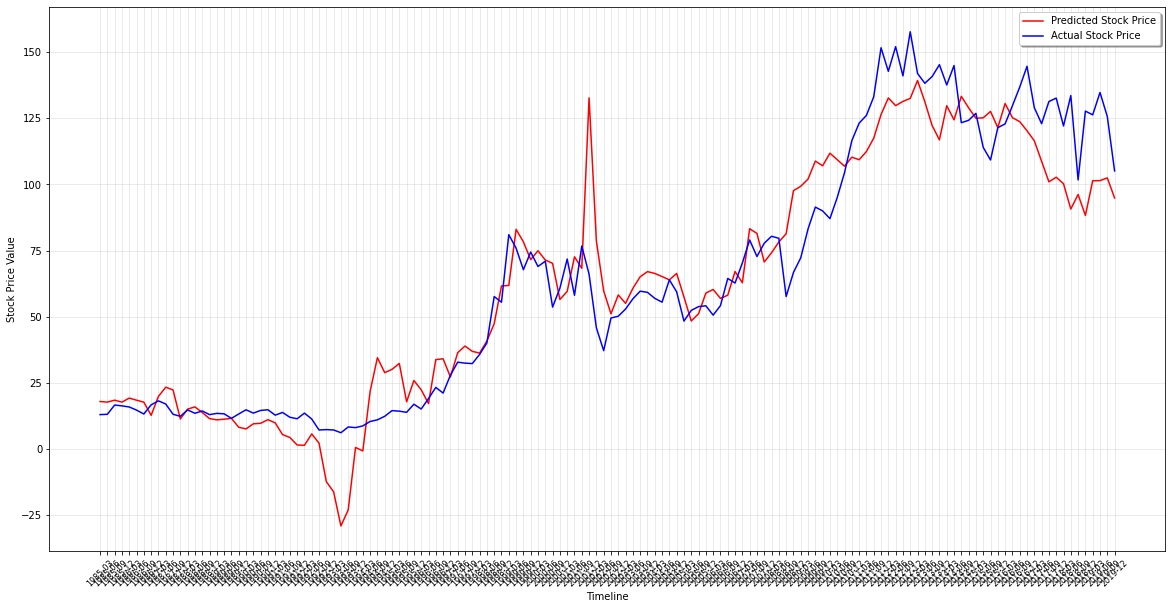

RMSE 15.000244479112697


In [15]:
#params = str(Params)
# Chage on attributes and no change on PricePerShare
# Reduced attributes v2
# TSCO

# Plot parameters
START_DATE_FOR_PLOTTING = '1985-03'
ENDING_DATE_FOR_PLOTTING = '2020-03'
START_INDEX = data.index.get_loc(START_DATE_FOR_PLOTTING)
ENDING_INDEX = data.index.get_loc(ENDING_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(data.index[START_INDEX:ENDING_INDEX], PRED[START_INDEX:ENDING_INDEX], color='red', label='Predicted Stock Price')
plt.plot(data.index[START_INDEX:ENDING_INDEX], y_scaled[START_INDEX:ENDING_INDEX], color='b', label='Actual Stock Price')

#plt.axvline(x = data.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
#plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled[:-1], PRED[1:], squared=False))

'NSC'

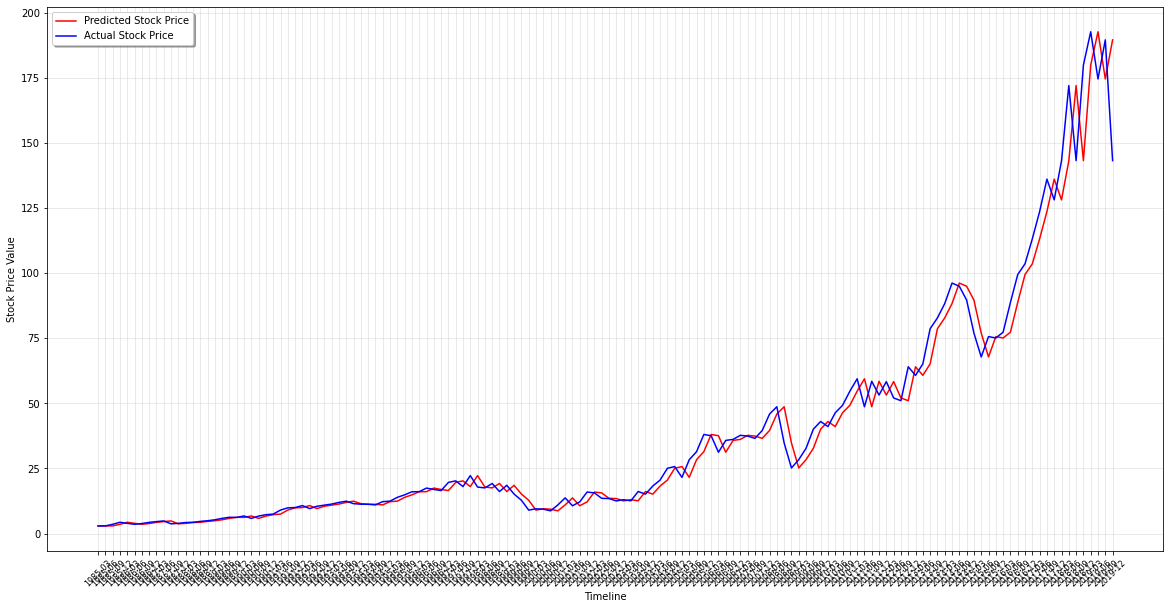

RMSE 9.083533490186424
R2-score test: 0.9400463875009923
RMSE test: 11.34470120324071
MAE test: 6.319464535548769


'GL'

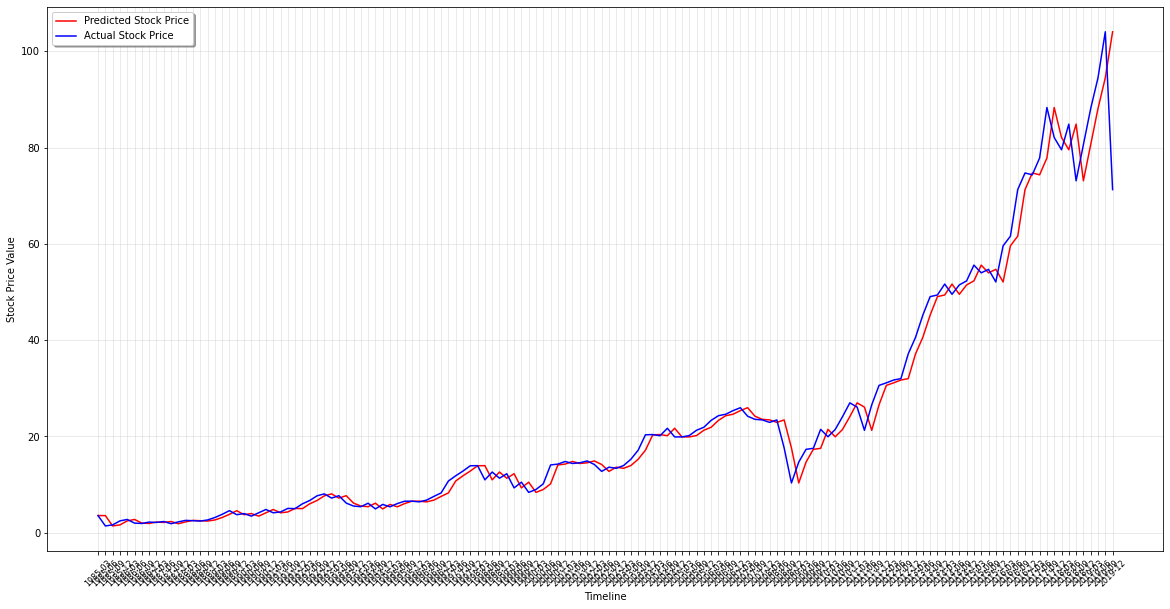

RMSE 4.165246390025516
R2-score test: 0.9864010191229328
RMSE test: 2.980696409117097
MAE test: 2.019756276032019


'PEP'

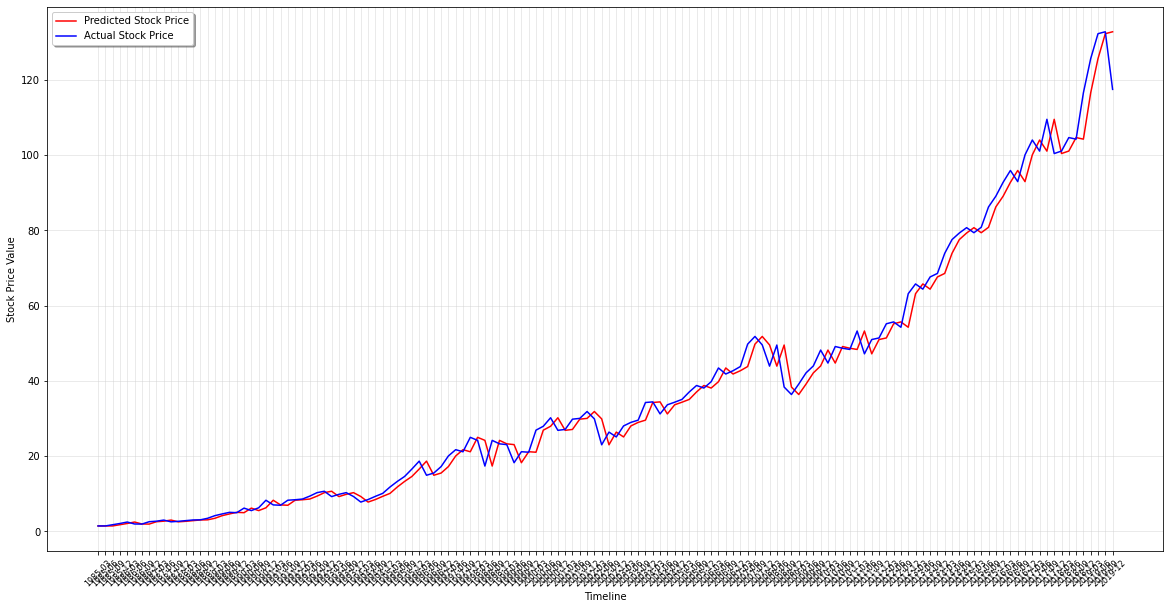

RMSE 3.8292493701128487
R2-score test: 0.9893047444776165
RMSE test: 3.7193289624761063
MAE test: 2.3574428065069775


'BDX'

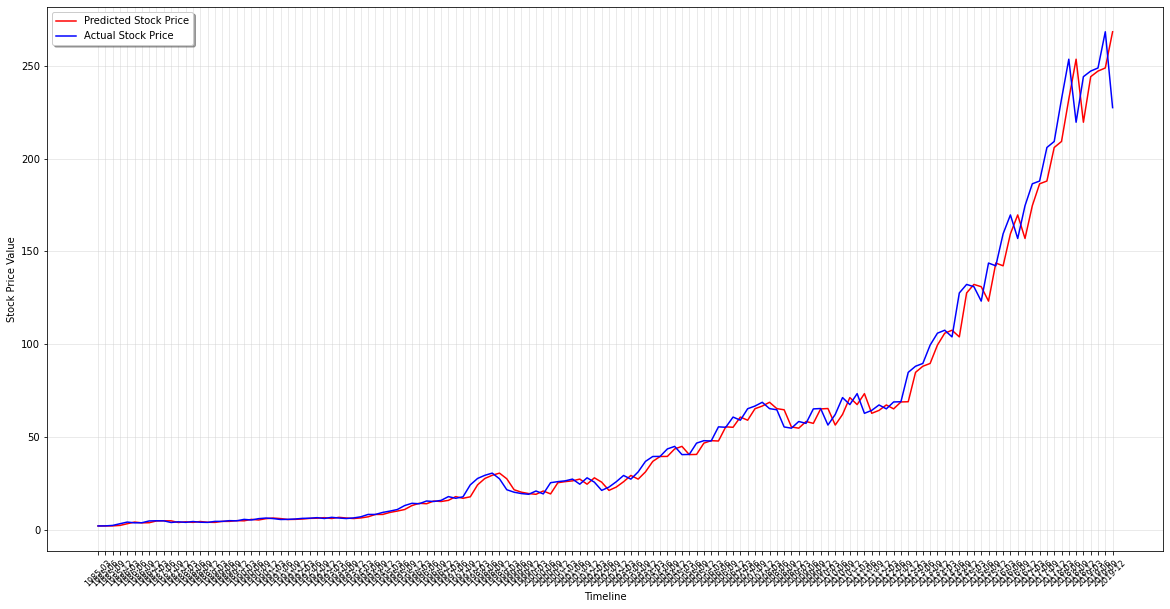

RMSE 7.963383505928208
R2-score test: 0.9916532726914947
RMSE test: 6.348489696564318
MAE test: 3.672082358393178


'IBM'

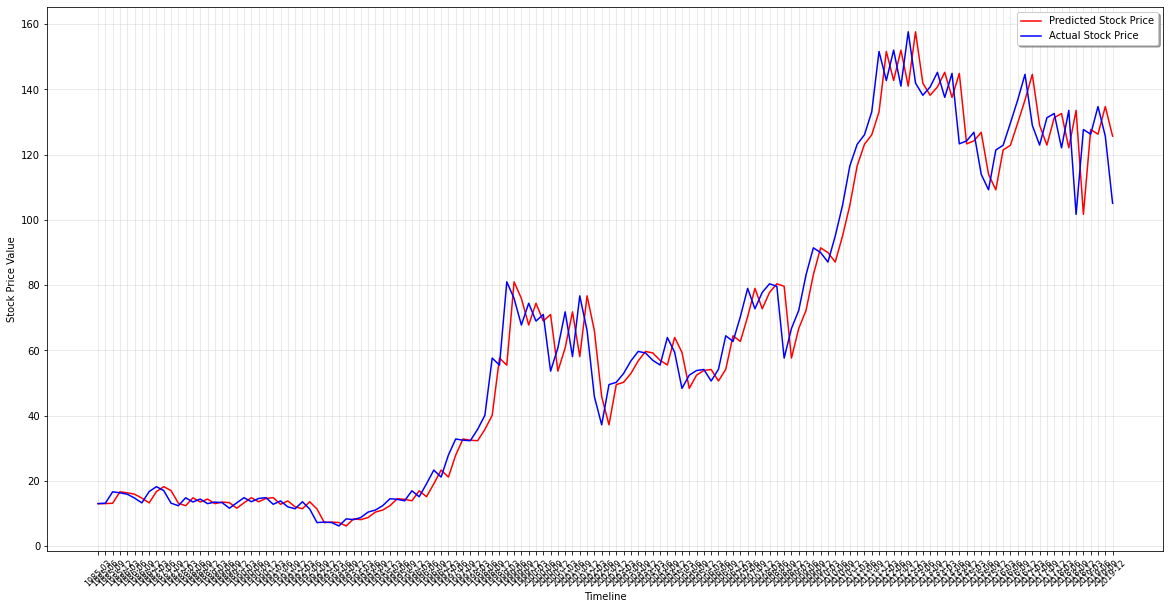

RMSE 8.471134935375497
R2-score test: 0.9694866596065725
RMSE test: 8.492608931779124
MAE test: 5.8210450698589415


In [7]:
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    display(stock)
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    X_scaled = np.array(data.drop(['Prediction'], axis=1))
    y_scaled = np.array(data['Prediction'])
    # Split the data into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    y_test_pred = list()
    for x in y_test:
        y_test_pred.append(y_scaled[list(y_scaled).index(x)+1])
    PRED = np.array(y_scaled)
    PRED[0] = y_scaled[0]
    PRED[1:] = y_scaled[0:-1]
    
    #Visualization
    #params = str(Params)
    # Chage on attributes and no change on PricePerShare
    # Reduced attributes v2
    # TSCO

    # Plot parameters
    START_DATE_FOR_PLOTTING = '1985-03'
    ENDING_DATE_FOR_PLOTTING = '2020-03'
    START_INDEX = data.index.get_loc(START_DATE_FOR_PLOTTING)
    ENDING_INDEX = data.index.get_loc(ENDING_DATE_FOR_PLOTTING)
    fig1,ax1 = plt.subplots(figsize=(20,10))


    plt.plot(data.index[START_INDEX:ENDING_INDEX], PRED[START_INDEX:ENDING_INDEX], color='red', label='Predicted Stock Price')
    plt.plot(data.index[START_INDEX:ENDING_INDEX], y_scaled[START_INDEX:ENDING_INDEX], color='b', label='Actual Stock Price')

    #plt.axvline(x = data.index[-5], color='green', linewidth=2, linestyle='--')

    plt.grid(which='major', color='#cccccc', alpha=0.5)

    plt.legend(shadow=True)
    #plt.title(params, family='DejaVu Sans', fontsize=12)
    plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
    plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.show()

    print("RMSE",mean_squared_error(y_scaled, PRED, squared=False))
    print("R2-score test:",r2_score(y_test, y_test_pred))
    print("RMSE test:",mean_squared_error(y_test, y_test_pred, squared=False))
    print("MAE test:",mean_absolute_error(y_test, y_test_pred))